# **Artificial Intelligence**
# **School of Mechanical Engineering-Tehran University**
# **2022**

# **Dear students**

# **This notebook is about Transfer Learning. VGG16 has been used for Transfer Learning.** 

# **[1]. Please study VGG16 during the new year. It is a simple network, and you should be able to follow its architecture, given that we have covered LeNet and AlexNet.**

# **[2]. VGG16 will be explained during the first tutorial after the new year. Then, we will dedicate two tutorials to go through the codes in this notebook.**

# **[3].** **Convolutional Neural Networks** (https://www.ibm.com/cloud/learn/convolutional-neural-networks **have applications in Engineering.** **For instance, you can study the following papers:**

# **A.CNN based tool monitoring system to predict life of cutting tool** (https://link.springer.com/article/10.1007/s42452-020-2598-2 )

# **B.Convolutional Neural Network applications in additive** **manufacturing: A review** (https://www.sciencedirect.com/science/article/pii/S2666912922000046 )

# **[4]. If warranted, we will repeat a tutorial to ensure that all students learn the architectures and the codes—nothing to worry about.**

# **If further elucidation is warranted, please drop me a line.**

# **Affiliated Research Professor Mohammad Khoshnevisan**

# **Cheers,**




# **Part 1: Transfer Learning-Pre-trained model as a classifier on a single image**
# **VGG16**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/CImage/VGG-16N.png', width=900,height=900) 

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CImage/VGG-16N.png'

# **I. Pre-trained convolutional neural network model using VGG16-We are using pre-trained convolutional neural network models, VGG16. There is a list of pre-trained models in tf.keras. To load The pre-trained model, we use tf.keras applications.modelname. To see the model architecture of the pre-trained model, we use the model.summary. For example, the model architecture of VGG 16 can be viewed in this notebook. We will load and inspect a pre-train ConvNet with tf.keras and then use the pre-trained model as a classifier on a single image. We can use model.layers. The image size after the loading is 224 by 224. Then it will be converted to a NumPy array(224 by 224 image size plus three is the color channel). We call the decode predictions method to get the predictive class with the highest probability. Then we can see the predicted class.**

#**II.The VGG network is a derivation of AlexNet that Andrew Zisserman and Karen Simonyan created at the Visual Geometry Group (VGG) at the University of Oxford in 2015. VGGNet was also trained on the ImageNet dataset, except it takes images with (224 × 224 × 3 )sampled from the rescaled images in the dataset as input. Please note that VGG-16 has 16 layers. This architecture has variants that have 11, 13, and 19 layers.The entire network can be broken down into the following operations:**


# **Convolution layer 1**: 64 kernels with a size of 3 × 3, a stride of 1, and the same padding. This results in a layer with a size of 224 × 224 × 64.

# **Nonlinearity 1**: ReLU activation applied to the output from convolution layer 1.

# **Convolution layer 2**: 64 kernels with a size of 3 × 3, a stride of 1, and the same padding. This results in a layer with a size of 224 × 224 × 64.

# **Nonlinearity 2**: ReLU activation applied to the output from convolution layer 2.

# **Subsampling layer 1**: Maximum pool with a size of 2 × 2 and a stride of 2. This results in a layer with a size of 112 × 112 × 64.

# **Convolution layer 3**: 128 kernels with a size of 3 × 3, a stride of 1, and the same padding. This results in a layer with a size of 112 × 112 × 128.

# **Nonlinearity 3**: ReLU activation applied to the output from convolution layer 3.

# **Convolution layer 4**: 128 kernels with a size of 3 × 3, a stride of 1, and the same padding. This results in a layer with a size of 112 × 112 × 128.

# **Nonlinearity 4**: ReLU activation applied to the output from convolution layer 4.

# **Subsampling layer 2**: Maximum pool with a size of 2 × 2 and a stride of 2. This results in a layer with a size of 56 × 56 × 128.

# **Convolution layer 5**: 256 kernels with a size of 3 × 3, a stride of 1, and the same padding. This results in a layer with a size of 56 × 56 × 256.

# **Nonlinearity 5**: ReLU activation applied to the output from convolution layer 5.

# **Convolution layer 6**: 256 kernels with a size of 3 × 3, a stride of 1, and the same padding. This results in a layer with a size of 56 × 56 × 256.

# **Nonlinearity 6**: ReLU activation applied to the output from convolution layer 6.

# **Convolution layer 7**: 256 kernels with a size of 3 × 3, a stride of 1, and the same padding. This results in a layer with a size of 56 × 56 × 256.

# **Nonlinearity 7**: ReLU activation applied to the output from convolution layer 7.

# **Subsampling layer 3**: Maximum pool with a size of 2 × 2 and a stride of 2. This results in a layer with a size of 28 × 28 × 256.

# **Convolution layer 8**: 512 kernels with a size of 3 × 3, a stride of 1, and the same padding. This results in a layer with a size of 28 × 28 × 512.

# **Nonlinearity 8**: ReLU activation applied to the output from convolution layer 8.

# **Convolution layer 9**: 512 kernels with a size of 3 × 3, a stride of 1, and the same padding. This results in a layer with a size of 28 × 28 × 512.

# **Nonlinearity 9**: ReLU activation applied to the output from convolution layer 9.

# **Convolution layer 10**: 512 kernels with a size of 3 × 3, a stride of 1, and the same padding. This results in a layer with a size of 28 × 28 × 512.

# **Nonlinearity 10**: ReLU activation applied to the output from convolution layer 10.

# **Subsampling layer 4**: Maximum pool with a size of 2 × 2 and a stride of 2. This results in a layer with a size of 14 × 14 × 512.

# **Convolution layer 11**: 512 kernels with a size of 3×3, a stride of 1, and the same padding. This results in a layer with a size of 14 × 14 × 512.

# **Nonlinearity 11**: ReLU activation applied to the output from convolution layer 11.

# **Convolution layer 12**: 512 kernels with a size of 3 × 3, a stride of 1, and the same padding. This results in a layer with a size of 14 × 14 × 512.

# **Nonlinearity 12**: ReLU activation applied to the output from convolution layer 12.

# **Convolution layer 13**: 512 kernels with a size of 3 × 3, a stride of 1, and the same padding. This results in a layer with a size of 14 × 14 × 512.

# **Nonlinearity 13**: ReLU activation applied to the output from convolution layer 13.

# **Subsampling layer 5**: Maximum pool with a size of 2 × 2 and a stride of 2. This results in a layer with a size of 7 × 7 × 512.

# **Fully connected layer 1**: A fully connected layer with 4,096 neurons.

# **Nonlinearity 14**: ReLU activation applied to the output from fully connected layer 1.

# **Fully connected layer 2**: A fully connected layer with 4,096 neurons.

# **Nonlinearity 15**: ReLU activation applied to the output from fully connected layer 2.

# **Output layer**: Softmax applied to the 1,000 neurons to calculate the probability of it being one of the classes.

In [ ]:
%tensorflow_version 2.x

# **1. We import libraries.**

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
import numpy as np
import matplotlib.pylab as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications.imagenet_utils import decode_predictions

# **2.We load pretrained model VGG16.**

In [ ]:
vgg16_model = tf.keras.applications.VGG16(
              weights="imagenet", 
              input_shape=(224, 224, 3),
              include_top = True)

553476096/553467096 [==============================] - 5s 0us/step


# **3. We get the model summary.**

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
len(vgg16_model.layers)

23

#**4. We use the pretrained ConvNet to classify one image.**

In [ ]:
def load_process_image(file_path):

  
  image_original = load_img(file_path, target_size=(224, 224))
  print("Image size after loading", image_original.size)

  
  image_array = img_to_array(image_original)
  print("Image size after converting to numpy array", image_array.shape)

  # Note: Expand dims to add batch size as 1
  image_batch = np.expand_dims(image_array, axis=0)
  print("Image size after expanding dimension", image_batch.shape)

  # Note : Preprocess image
  image_preprocessed = tf.keras.applications.vgg16.preprocess_input(image_batch)

  return image_original, image_preprocessed

In [ ]:
cat_image_file_path = "/content/drive/MyDrive/CImage/C.png"

# **5. We set image file path.**

In [ ]:
cat_image_original, cat_image_preprocessed = load_process_image(cat_image_file_path)

Image size after loading (224, 224)
Image size after converting to numpy array (224, 224, 3)
Image size after expanding dimension (1, 224, 224, 3)


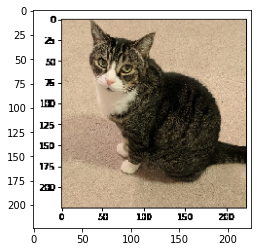

In [ ]:
plt.imshow(cat_image_original)

In [ ]:
predictions = vgg16_model.predict(cat_image_preprocessed)

# **6. We get the predictions by the model.Note that there are 1000 predictions.**

In [ ]:
predictions.shape

(1, 1000)


# **7. We get the prediction class with the highest probability.**

In [ ]:
predicted_class = decode_predictions(predictions, top=1)

49152/35363 [=========================================] - 0s 0us/step


In [ ]:
predicted_class 

[[('n02123045', 'tabby', 0.39231336)]]

# **8. We show the image along with the predicted class.**

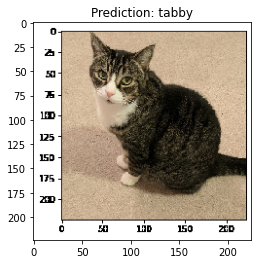

In [ ]:
plt.imshow(cat_image_original)
predicted_class_name = predicted_class[0][0][1]
_ = plt.title("Prediction: " + predicted_class_name)

#**Part 2: Transfer Learning using VGG16 with the flowers dataset.The dataset is provided in Google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pwd

'/content/drive/My Drive/DL'

In [ ]:
%cd /content/drive/MyDrive/DL/Dataset

/content/drive/MyDrive/DL/Dataset



# **1. We unzip the dataset zip file and put it in the same folder.**

In [ ]:
!unzip flowers.zip

Archive:  flowers.zip
   creating: flowers/
   creating: flowers/test/
   creating: flowers/test/daisy/
  inflating: flowers/test/daisy/16833748795_b681b2839f_n.jpg  
  inflating: flowers/test/daisy/17027891179_3edc08f4f6.jpg  
  inflating: flowers/test/daisy/17101762155_2577a28395.jpg  
  inflating: flowers/test/daisy/17249393016_093e915012_n.jpg  
  inflating: flowers/test/daisy/17357636476_1953c07aa4_n.jpg  
  inflating: flowers/test/daisy/17821980772_35164ae1e8_n.jpg  
  inflating: flowers/test/daisy/18023717391_e2c9089e10.jpg  
  inflating: flowers/test/daisy/5924910021_b6debeb7b5_n.jpg  
  inflating: flowers/test/daisy/5944315415_2be8abeb2f_m.jpg  
  inflating: flowers/test/daisy/6054952060_c88612f3c5_n.jpg  
  inflating: flowers/test/daisy/6776075110_1ea7a09dd4_n.jpg  
  inflating: flowers/test/daisy/7133935763_82b17c8e1b_n.jpg  
  inflating: flowers/test/daisy/7188513571_c8527b123a_n.jpg  
  inflating: flowers/test/daisy/7358085448_b317d11cd5.jpg  
  inflating: flowers/test/dai

In [ ]:
%pwd

'/content/drive/MyDrive/DL/Dataset'

In [ ]:
%cd /content/drive/MyDrive/DL

/content/drive/MyDrive/DL


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator



# **2. We import all vgg16 packages.**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model




# **3. We construct an instance of ImageDataGenerator class.**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)
test_datagen = ImageDataGenerator(
    rescale = 1/255
)


# **4. We instantiate the VGG16 model.**

In [ ]:
model = VGG16(include_top=False, input_shape=(224,224,3))


# **5. We specify that the layers are not trainable.**

In [ ]:
for layer in model.layers:
    layer.trainable = False



# **6.We do all the following steps:**
# **Flatten the output from the second last fully connected layer in VGG.**
# **Fully connected layer with 512 hidden units and ReLU activation.**
# **The last fully connected sigmoid layer with five neurons.**


In [ ]:
flatten_layer = layers.Flatten()(model.output)


flattened_fc_layer = layers.Dense(512, activation='relu')(flatten_layer)


flattened_fc_softmax_layer = layers.Dense(5, activation='softmax')(flattened_fc_layer)



#**7.We define a new model with a base VGG model combined with the new layers that we have created.**

In [ ]:
model = Model(inputs=model.inputs, outputs=flattened_fc_softmax_layer)


# **8. We use the iterators to loop through every image.**

In [ ]:
training_iterator = train_datagen.flow_from_directory('Dataset/flowers/train', batch_size=10, target_size=(224,224))
testing_iterator = test_datagen.flow_from_directory('Dataset/flowers/test', batch_size=10, target_size=(224,224))



Found 336 images belonging to 5 classes.
Found 95 images belonging to 5 classes.


# **9. We compile and fit the model.**

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=20)



Epoch 1/20
34/34 [==============================] - 11s 295ms/step - loss: 4.8174 - accuracy: 0.2798 - val_loss: 1.1990 - val_accuracy: 0.5474
Epoch 2/20
34/34 [==============================] - 8s 241ms/step - loss: 0.9641 - accuracy: 0.6101 - val_loss: 1.5957 - val_accuracy: 0.4526
Epoch 3/20
34/34 [==============================] - 8s 244ms/step - loss: 0.6747 - accuracy: 0.7321 - val_loss: 1.2265 - val_accuracy: 0.5474
Epoch 4/20
34/34 [==============================] - 8s 244ms/step - loss: 0.6833 - accuracy: 0.7500 - val_loss: 1.7093 - val_accuracy: 0.5158
Epoch 5/20
34/34 [==============================] - 8s 240ms/step - loss: 0.5288 - accuracy: 0.8036 - val_loss: 1.4570 - val_accuracy: 0.5158
Epoch 6/20
34/34 [==============================] - 9s 255ms/step - loss: 0.6034 - accuracy: 0.7887 - val_loss: 2.5057 - val_accuracy: 0.4000
Epoch 7/20
34/34 [==============================] - 8s 246ms/step - loss: 0.7075 - accuracy: 0.7827 - val_loss: 1.7406 - val_accuracy: 0.5158
Epoch

# **10. We import matplotlib**

In [ ]:
import matplotlib.pyplot as plt

# **11. We plot loss vs epochs.**

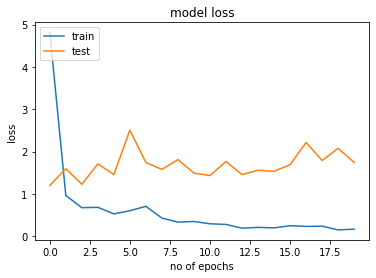

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()


# **12. We plot accuracy vs epochs.**



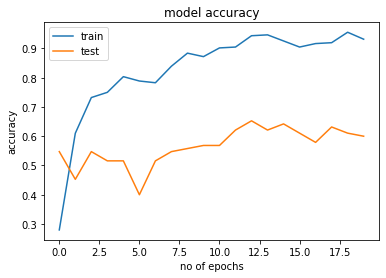

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()


# **13.We save our model.**

In [ ]:
model.save('/content/drive/MyDrive/DL/models/TransferL_VGG16_Flower.h5')

# **14.We import libraries.**

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np


# **15. We load our saved model.**

In [ ]:
model = load_model('models/TransferL_VGG16_Flower.h5')


# **16.We load an image for prediction.**

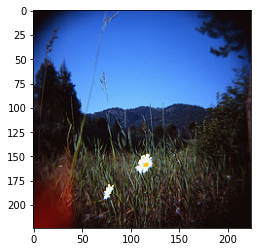

In [ ]:
img = load_img('/content/drive/MyDrive/DL/images/5944315415_2be8abeb2f_m.jpg', target_size=(224,224))
plt.imshow(img)
plt.show()


# **17. We covert our image to array and add a dimension.**
# **Note : You should find out the reason for adding a dimension.**


In [ ]:
img = img_to_array(img)
img = img.reshape(1,224,224,3)


# **18. We obtain the prediction.**

In [ ]:
result = model.predict(img)


# **19. We get our class labels from the iterator.**

In [ ]:
class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


# **20. We print the predictions.**

In [ ]:
print(result)



[[0.00000e+00 6.39499e-37 0.00000e+00 1.00000e+00 0.00000e+00]]


# **21. We print the maximum probability class.**

In [ ]:
result = np.argmax(result)
print(result)



3


# **22. We print the class label.**

In [ ]:
print([key for key in class_labels][result])


sunflower


**References**

**Hands-On Transfer Learning with TensorFlow 2.0, by Margaret** **Maynard-Reid, Publication date: May 2020**

**Github**

